### LSE Data Analytics Online Career Accelerator 

# DA301:  Advanced Analytics for Organisational Impact

### Scenario
You are a data analyst working for Turtle Games, a game manufacturer and retailer. They manufacture and sell their own products, along with sourcing and selling products manufactured by other companies. Their product range includes books, board games, video games and toys. They have a global customer base and have a business objective of improving overall sales performance by utilising customer trends. In particular, Turtle Games wants to understand: 
- how customers accumulate loyalty points (Week 1)
- how useful are remuneration and spending scores data (Week 2)
- can social data (e.g. customer reviews) be used in marketing campaigns (Week 3)
- what is the impact on sales per product (Week 4)
- the reliability of the data (e.g. normal distribution, Skewness, Kurtosis) (Week 5)
- if there is any possible relationship(s) in sales between North America, Europe, and global sales (Week 6).

# Week 1 assignment: Linear regression using Python
The marketing department of Turtle Games prefers Python for data analysis. As you are fluent in Python, they asked you to assist with data analysis of social media data. The marketing department wants to better understand how users accumulate loyalty points. Therefore, you need to investigate the possible relationships between the loyalty points, age, remuneration, and spending scores. Note that you will use this data set in future modules as well and it is, therefore, strongly encouraged to first clean the data as per provided guidelines and then save a copy of the clean data for future use.

## Instructions
1. Load and explore the data.
    1. Create a new DataFrame (e.g. reviews).
    2. Sense-check the DataFrame.
    3. Determine if there are any missing values in the DataFrame.
    4. Create a summary of the descriptive statistics.
2. Remove redundant columns (`language` and `platform`).
3. Change column headings to names that are easier to reference (e.g. `renumeration` and `spending_score`).
4. Save a copy of the clean DataFrame as a CSV file. Import the file to sense-check.
5. Use linear regression and the `statsmodels` functions to evaluate possible linear relationships between loyalty points and age/renumeration/spending scores to determine whether these can be used to predict the loyalty points.
    1. Specify the independent and dependent variables.
    2. Create the OLS model.
    3. Extract the estimated parameters, standard errors, and predicted values.
    4. Generate the regression table based on the X coefficient and constant values.
    5. Plot the linear regression and add a regression line.
6. Include your insights and observations.

## 1. Load and explore the data

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
from statsmodels.formula.api import ols

In [2]:
# Load the CSV file(s) as reviews.
# Import the data set.
reviews = pd.read_csv('turtle_reviews.csv')

# View the DataFrame.
reviews

,gender,age,remuneration (k£),spending_score (1-100),loyalty_points,education,language,platform,product,review,summary
0,Male,18,12.30,39,210,graduate,EN,Web,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,EN,Web,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,EN,Web,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,EN,Web,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,EN,Web,291,As my review of GF9's previous screens these w...,Money trap
...,...,...,...,...,...,...,...,...,...,...,...
1995,Female,37,84.46,69,4031,PhD,EN,Web,977,The perfect word game for mixed ages (with Mom...,The perfect word game for mixed ages (with Mom
1996,Female,43,92.66,8,539,PhD,EN,Web,979,Great game. Did not think I would like it whe...,Super fun
1997,Male,34,92.66,91,5614,graduate,EN,Web,1012,Great game for all.........\nKeeps the mind ni...,Great Game
1998,Male,34,98.40,16,1048,PhD,EN,Web,1031,fun game!,Four Stars


In [3]:
# Any missing values?
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  2000 non-null   object 
 1   age                     2000 non-null   int64  
 2   remuneration (k£)       2000 non-null   float64
 3   spending_score (1-100)  2000 non-null   int64  
 4   loyalty_points          2000 non-null   int64  
 5   education               2000 non-null   object 
 6   language                2000 non-null   object 
 7   platform                2000 non-null   object 
 8   product                 2000 non-null   int64  
 9   review                  2000 non-null   object 
 10  summary                 2000 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 172.0+ KB


In [4]:
# Explore the data.
reviews.head() 

,gender,age,remuneration (k£),spending_score (1-100),loyalty_points,education,language,platform,product,review,summary
0,Male,18,12.30,39,210,graduate,EN,Web,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,EN,Web,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,EN,Web,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,EN,Web,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,EN,Web,291,As my review of GF9's previous screens these w...,Money trap


In [5]:
# Descriptive statistics.
reviews.describe()

,age,remuneration (k£),spending_score (1-100),loyalty_points,product
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,39.495000,48.079060,50.000000,1578.032000,4320.521500
std,13.573212,23.123984,26.094702,1283.239705,3148.938839
min,17.000000,12.300000,1.000000,25.000000,107.000000
25%,29.000000,30.340000,32.000000,772.000000,1589.250000
50%,38.000000,47.150000,50.000000,1276.000000,3624.000000
75%,49.000000,63.960000,73.000000,1751.250000,6654.000000
max,72.000000,112.340000,99.000000,6847.000000,11086.000000


## 2. Drop columns

In [6]:
# Drop unnecessary columns.
reviews2 = reviews.drop(['language', 'platform'], axis=1)  

# View column names.
reviews2.head()

,gender,age,remuneration (k£),spending_score (1-100),loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


## 3. Rename columns

In [7]:
# Rename the column headers.
reviews2.rename(columns = {'remuneration (k£)':'remuneration', 'spending_score (1-100)':'spending_score'}, inplace = True)

# View column names.
reviews2

,gender,age,remuneration,spending_score,loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap
...,...,...,...,...,...,...,...,...,...
1995,Female,37,84.46,69,4031,PhD,977,The perfect word game for mixed ages (with Mom...,The perfect word game for mixed ages (with Mom
1996,Female,43,92.66,8,539,PhD,979,Great game. Did not think I would like it whe...,Super fun
1997,Male,34,92.66,91,5614,graduate,1012,Great game for all.........\nKeeps the mind ni...,Great Game
1998,Male,34,98.40,16,1048,PhD,1031,fun game!,Four Stars


## 4. Save the DataFrame as a CSV file

In [8]:
# Create a CSV file as output.
reviews2.to_csv('reviews2.csv', index=False)

In [9]:
# Import new CSV file with Pandas.
reviews2 = pd.read_csv('reviews2.csv')

# View DataFrame.
reviews2.info()
print(reviews2.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          2000 non-null   object 
 1   age             2000 non-null   int64  
 2   remuneration    2000 non-null   float64
 3   spending_score  2000 non-null   int64  
 4   loyalty_points  2000 non-null   int64  
 5   education       2000 non-null   object 
 6   product         2000 non-null   int64  
 7   review          2000 non-null   object 
 8   summary         2000 non-null   object 
dtypes: float64(1), int64(4), object(4)
memory usage: 140.8+ KB
(2000, 9)


## 5. Linear regression

### 5a) spending vs loyalty

In [10]:
# Define the dependent variable.
y = reviews2['loyalty_points']
 

# Define the independent variable.
x = reviews2['spending_score']

# OLS model and summary.
f = 'y ~ x'
spending_loyalty = ols(f, data = reviews2).fit()

# Print the regression table.
spending_loyalty.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     1648.
Date:                Wed, 07 Sep 2022   Prob (F-statistic):          2.92e-263
Time:                        09:03:32   Log-Likelihood:                -16550.
No. Observations:                2000   AIC:                         3.310e+04
Df Residuals:                    1998   BIC:                         3.312e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -75.0527     45.931     -1.634      0.102    -165.129      15.024
x             33.0617      0.814     40.595      0.000      31.464      34.659
==============================================================================
Omnibus:                      126.554   Durbin-Watson:                   1.191
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              260.528
Skew:                           0.422   Prob(JB):                     2.67e-57
Kurtosis:                       4.554   Cond. No.                         122.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

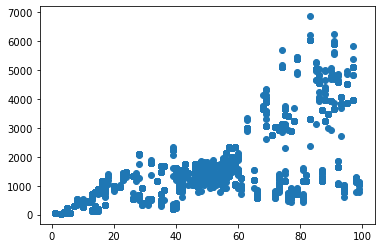

In [11]:
# Check for linearity.
plt.scatter(x, y)

In [12]:
# Extract the estimated parameters.
print("Parameters: ", spending_loyalty.params)  

# Extract the standard errors.
print("Standard errors: ", spending_loyalty.bse)  

# Extract the predicted values.
print("Predicted values: ", spending_loyalty.predict())


Parameters:  Intercept   -75.052663
x            33.061693
dtype: float64
Standard errors:  Intercept    45.930554
x             0.814419
dtype: float64
Predicted values:  [1214.35337415 2602.94449102  123.31749662 ... 2933.56142361  453.93442921
  189.44088314]


In [13]:
# Set the X coefficient and the constant to generate the regression table.
# y= m*x+c
y_pred = 33.0616 * reviews2['spending_score'] -75.0526

# View the output.
y_pred

0       1214.3498
1       2602.9370
2        123.3170
3       2470.6906
4       1247.4114
          ...    
1995    2206.1978
1996     189.4402
1997    2933.5530
1998     453.9330
1999     189.4402
Name: spending_score, Length: 2000, dtype: float64

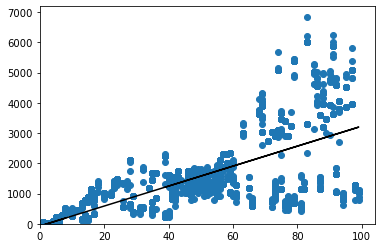

In [14]:
# Plot the graph with a regression line.
# Plot the data points.
plt.scatter(x,y)  

# Plot the regression line (in black).
plt.plot(x,y_pred, color='black') 

# Set the x and y limits on the axes:
plt.xlim(0)
plt.ylim(0)
plt.show()

### 5b) renumeration vs loyalty

In [15]:
# Define the dependent variable.
y = reviews2['loyalty_points']
 

# Define the independent variable.
x = reviews2['remuneration']

# OLS model and summary.
f = 'y ~ x'
remuneration_loyalty = ols(f, data = reviews2).fit()

# Print the regression table.
remuneration_loyalty.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     1222.
Date:                Wed, 07 Sep 2022   Prob (F-statistic):          2.43e-209
Time:                        09:04:48   Log-Likelihood:                -16674.
No. Observations:                2000   AIC:                         3.335e+04
Df Residuals:                    1998   BIC:                         3.336e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -65.6865     52.171     -1.259      0.208    -168.001      36.628
x             34.1878      0.978     34.960      0.000      32.270      36.106
==============================================================================
Omnibus:                       21.285   Durbin-Watson:                   3.622
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.715
Skew:                           0.089   Prob(JB):                     1.30e-07
Kurtosis:                       3.590   Cond. No.                         123.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

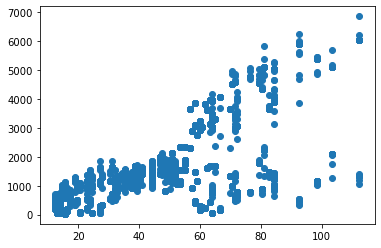

In [16]:
# Check for linearity.
plt.scatter(x, y)

In [17]:
# Extract the estimated parameters.
print("Parameters: ", remuneration_loyalty.params)  

# Extract the standard errors.
print("Standard errors: ", remuneration_loyalty.bse)  

# Extract the predicted values.
print("Predicted values: ", remuneration_loyalty.predict())  


Parameters:  Intercept   -65.686513
x            34.187825
dtype: float64
Standard errors:  Intercept    52.170717
x             0.977925
dtype: float64
Predicted values:  [ 354.82374068  354.82374068  382.85775758 ... 3102.15739671 3298.39551499
 3102.15739671]


In [18]:
# Set the X coefficient and the constant to generate the regression table.
# y= m*x+c
y_pred = 34.1878* reviews2['remuneration'] -65.6865

# View the output.
y_pred

0        354.823440
1        354.823440
2        382.857436
3        382.857436
4        410.891432
           ...     
1995    2821.815088
1996    3102.155048
1997    3102.155048
1998    3298.393020
1999    3102.155048
Name: remuneration, Length: 2000, dtype: float64

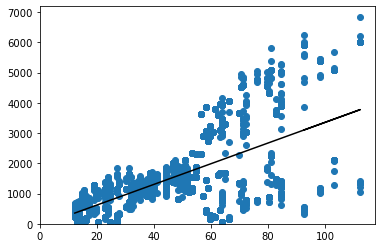

In [19]:
# Plot the graph with a regression line.
# Plot the data points.
plt.scatter(x,y)  

# Plot the regression line (in black).
plt.plot(x,y_pred, color='black') 

# Set the x and y limits on the axes:
plt.xlim(0)
plt.ylim(0)
plt.show()

### 5c) age vs loyalty

In [20]:
# Define the dependent variable.
y = reviews2['loyalty_points']
 

# Define the independent variable.
x = reviews2['age']

# OLS model and summary.
f = 'y ~ x'
age_loyalty = ols(f, data = reviews2).fit()

# Print the regression table.
age_loyalty.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.606
Date:                Wed, 07 Sep 2022   Prob (F-statistic):             0.0577
Time:                        09:05:12   Log-Likelihood:                -17150.
No. Observations:                2000   AIC:                         3.430e+04
Df Residuals:                    1998   BIC:                         3.431e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1736.5177     88.249     19.678      0.000    1563.449    1909.587
x             -4.0128      2.113     -1.899      0.058      -8.157       0.131
==============================================================================
Omnibus:                      481.477   Durbin-Watson:                   2.277
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              937.734
Skew:                           1.449   Prob(JB):                    2.36e-204
Kurtosis:                       4.688   Cond. No.                         129.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

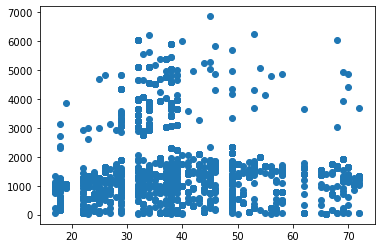

In [21]:
# Check for linearity.
plt.scatter(x, y)

In [22]:
# Extract the estimated parameters.
print("Parameters: ", age_loyalty.params)  

# Extract the standard errors.
print("Standard errors: ", age_loyalty.bse)  

# Extract the predicted values.
print("Predicted values: ", age_loyalty.predict())  

Parameters:  Intercept    1736.517739
x              -4.012805
dtype: float64
Standard errors:  Intercept    88.248731
x             2.113177
dtype: float64
Predicted values:  [1664.2872467  1644.22322095 1648.2360261  ... 1600.0823643  1600.0823643
 1608.1079746 ]


In [23]:
# Set the X coefficient and the constant to generate the regression table.
# y= m*x+c
y_pred = -4.0128* reviews2['age'] + 1736.5177

# View the output.
y_pred

0       1664.2873
1       1644.2233
2       1648.2361
3       1636.1977
4       1604.0953
          ...    
1995    1588.0441
1996    1563.9673
1997    1600.0825
1998    1600.0825
1999    1608.1081
Name: age, Length: 2000, dtype: float64

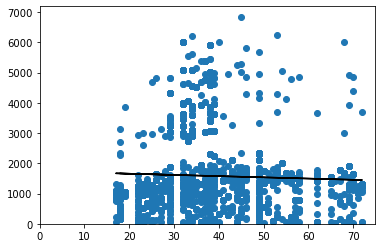

In [24]:
# Plot the graph with a regression line.
# Plot the data points.
plt.scatter(x,y)  

# Plot the regression line (in black).
plt.plot(x,y_pred, color='black') 

# Set the x and y limits on the axes:
plt.xlim(0)
plt.ylim(0)
plt.show()

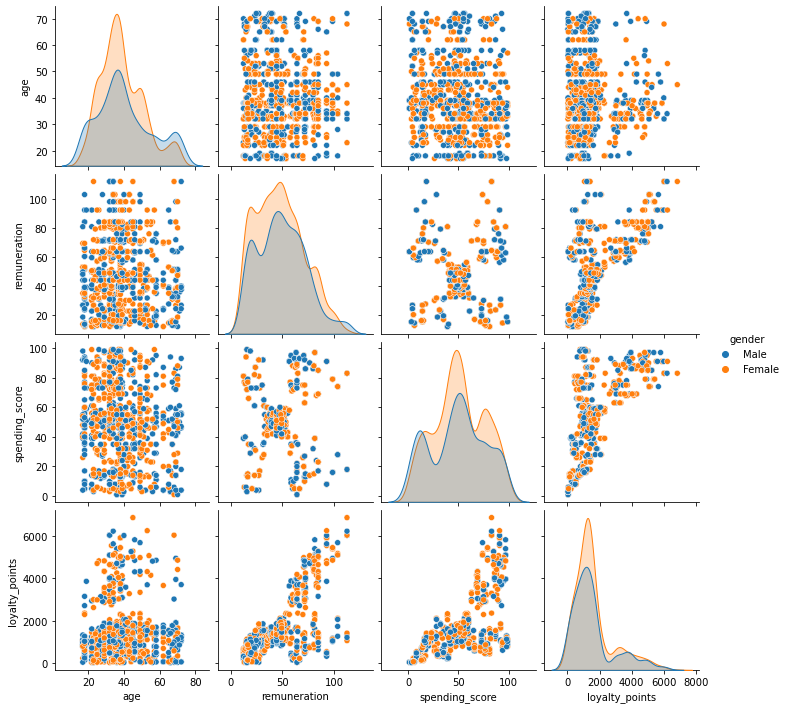

In [25]:
# Can use to review behaviour between classes.
var = reviews2[['age', 'remuneration', 'spending_score', 'loyalty_points']]

sns.pairplot(reviews2, vars=var, hue='gender', diag_kind= 'kde')

## 6. Observations and insights

***Your observations here...***






When looking at the possible correlation between the independent variables and dependent, which is loyalty points, a stronger correlation is on spending and remuneration. However, age is having less impact on loyalty points increase. Overall, when looking at the R-sq. that describes total variability of y explained by the variability of x, we can see that the total percentage per each case is not even close to 50%, age and loyalty points having a 0.002%. Also, when looking at the coefficient of x that describes the slope of the regression line by how much the response variable y changes when x changes by one unit, we can see that particularly on age/loyalty case we get a negative number, showing no relationship. The P value for both remuneration and spending score vs loyalty points are zero, thus, being highly statistically significant at explaining the variation in the dependent variable.

# 

# Week 2 assignment: Clustering with *k*-means using Python

The marketing department also wants to better understand the usefulness of renumeration and spending scores but do not know where to begin. You are tasked to identify groups within the customer base that can be used to target specific market segments. Use *k*-means clustering to identify the optimal number of clusters and then apply and plot the data using the created segments.

## Instructions
1. Prepare the data for clustering. 
    1. Import the CSV file you have prepared in Week 1.
    2. Create a new DataFrame (e.g. `df2`) containing the `renumeration` and `spending_score` columns.
    3. Explore the new DataFrame. 
2. Plot the renumeration versus spending score.
    1. Create a scatterplot.
    2. Create a pairplot.
3. Use the Silhouette and Elbow methods to determine the optimal number of clusters for *k*-means clustering.
    1. Plot both methods and explain how you determine the number of clusters to use.
    2. Add titles and legends to the plot.
4. Evaluate the usefulness of at least three values for *k* based on insights from the Elbow and Silhoutte methods.
    1. Plot the predicted *k*-means.
    2. Explain which value might give you the best clustering.
5. Fit a final model using your selected value for *k*.
    1. Justify your selection and comment on the respective cluster sizes of your final solution.
    2. Check the number of observations per predicted class.
6. Plot the clusters and interpret the model.

## 1. Load and explore the data

In [26]:
# Import necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from scipy.spatial.distance import cdist

import warnings
warnings.filterwarnings('ignore')

In [27]:
# Load the CSV file(s) as df2.
df2 = pd.read_csv('reviews2.csv')

# View DataFrame.
df2.head()

,gender,age,remuneration,spending_score,loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


In [28]:
# Drop unnecessary columns.
df2 = df2.drop(columns=['age', 'loyalty_points',
                             'education', 'product', 
                             'review', 'summary'])

# View DataFrame.
df2.head()

,gender,remuneration,spending_score
0,Male,12.30,39
1,Male,12.30,81
2,Female,13.12,6
3,Female,13.12,77
4,Female,13.94,40


In [29]:
# Explore the data.
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          2000 non-null   object 
 1   remuneration    2000 non-null   float64
 2   spending_score  2000 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 47.0+ KB


In [30]:
# Descriptive statistics.
df2.describe()

,remuneration,spending_score
count,2000.000000,2000.000000
mean,48.079060,50.000000
std,23.123984,26.094702
min,12.300000,1.000000
25%,30.340000,32.000000
50%,47.150000,50.000000
75%,63.960000,73.000000
max,112.340000,99.000000


## 2. Plot

<AxesSubplot:xlabel='remuneration', ylabel='spending_score'>

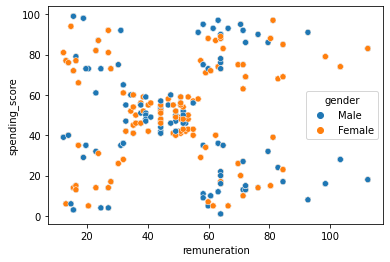

In [31]:
# Create a scatterplot with Seaborn.
sns.scatterplot(x='remuneration', y='spending_score',
                data=df2, hue='gender')

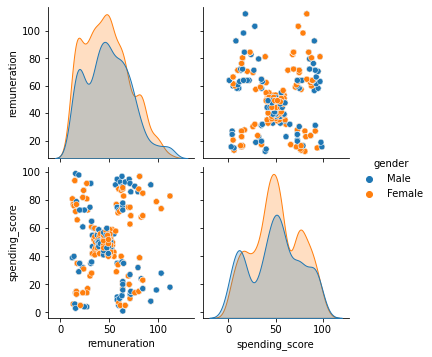

In [32]:
# Create a pairplot with Seaborn.
x = df2[['remuneration', 'spending_score']]

sns.pairplot(df2, vars=x,
             hue='gender', diag_kind= 'kde')

## 3. Elbow and silhoutte methods

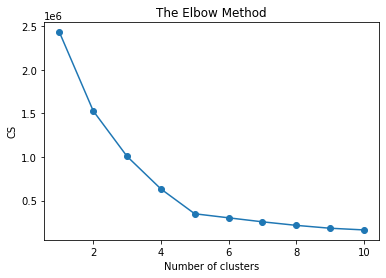

In [33]:
# Elbow chart for us to decide on the number of optimal clusters.
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    cs.append(kmeans.inertia_)

plt.plot(range(1, 11), cs, marker='o')
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("CS")

plt.show()

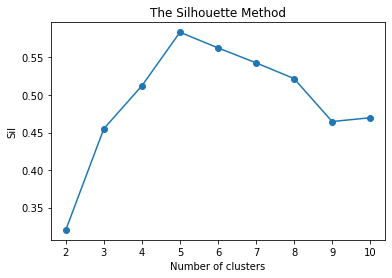

In [34]:
# Find the range of clusters to be used using silhouette method.
sil = []
kmax = 10

for k in range(2, kmax+1):
    kmeans_s = KMeans(n_clusters = k).fit(x)
    labels = kmeans_s.labels_
    sil.append(silhouette_score(x, labels, metric = 'euclidean'))

# Plot the silhouette method.
plt.plot(range(2, kmax+1), sil, marker='o')

plt.title("The Silhouette Method")
plt.xlabel("Number of clusters")
plt.ylabel("Sil")

plt.show()

## 4. Evaluate k-means model at different values of *k*

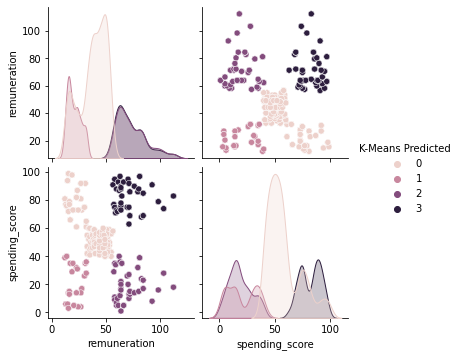

In [35]:
# Use 4 clusters:
kmeans = KMeans(n_clusters = 4, max_iter = 15000, init='k-means++', random_state=0).fit(x)
clusters = kmeans.labels_
x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x, hue='K-Means Predicted', diag_kind= 'kde')

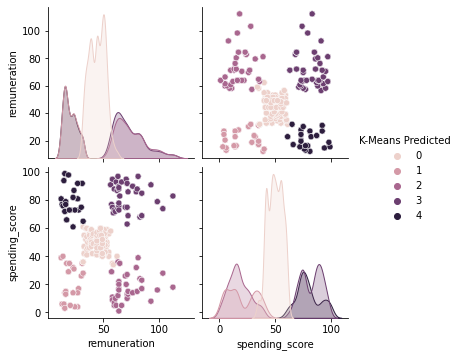

In [36]:
# Use 5 clusters:
kmeans = KMeans(n_clusters = 5, max_iter = 15000, init='k-means++', random_state=0).fit(x)
clusters = kmeans.labels_
x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x, hue='K-Means Predicted', diag_kind= 'kde')

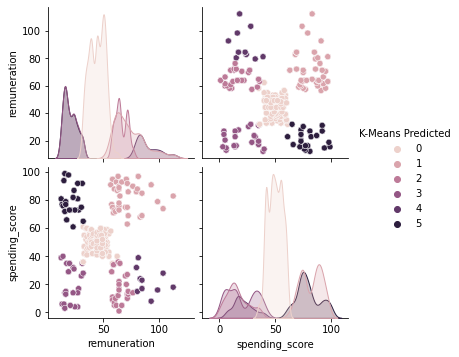

In [37]:
# Use 6 clusters:
kmeans = KMeans(n_clusters = 6, max_iter = 15000, init='k-means++', random_state=0).fit(x)
clusters = kmeans.labels_
x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x, hue='K-Means Predicted', diag_kind= 'kde')

## 5. Fit final model and justify your choice

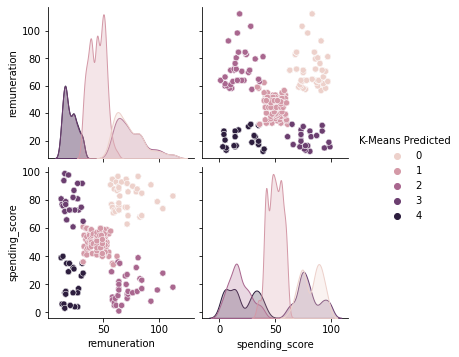

In [38]:
# Apply the final model.
# Use 5 clusters:
kmeans = KMeans(n_clusters = 5, max_iter = 15000, init='k-means++', random_state=0).fit(x)
clusters = kmeans.labels_
x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x, hue='K-Means Predicted', diag_kind= 'kde')

In [39]:
# Check the number of observations per predicted class.
x['K-Means Predicted'].value_counts()

1    774
0    356
2    330
4    271
3    269
Name: K-Means Predicted, dtype: int64

## 6. Plot and interpret the clusters

In [40]:
# Visualising the clusters.
# View the K-Means predicted.
print(x.head())

   remuneration  spending_score  K-Means Predicted
0         12.30              39                  4
1         12.30              81                  3
2         13.12               6                  4
3         13.12              77                  3
4         13.94              40                  4


<AxesSubplot:xlabel='remuneration', ylabel='spending_score'>

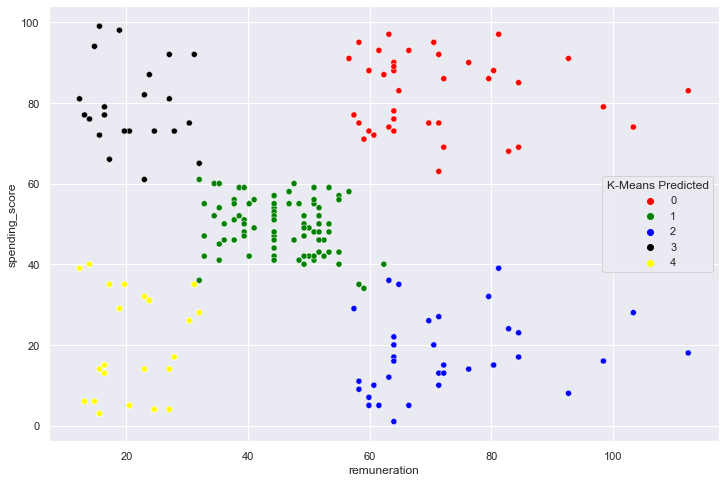

In [41]:
# Visualising the clusters.
# Set plot size.
sns.set(rc = {'figure.figsize':(12, 8)})

sns.scatterplot(x='remuneration' , 
                y ='spending_score',
                data=x , hue='K-Means Predicted',
                palette=['red', 'green', 'blue', 'black','yellow'])

## 7. Discuss: Insights and observations

***Your observations here...***

Furthermore, to target specific market segments, remuneration and spending scores were plot using a scatter and pairplot to find the correlation and possible clusters. A visibility of potential five clusters was detected.

Furthermore, Silhouette and Elbow method was used to help find the optimal number of clusters for k-means clustering. When analysing the elbow method, it can be clearly seen that the value metric initially changes rapidly and then is slowing down. When the point of rapid change stops, this is when the elbow point can be detected. In this case scenario the optimal number of clusters is showing five.

By looking at the silhouette method, which, represents the mean silhouette coefficient over points, the maximum point indicates five. 

An investigation has been made on testing three values for k and check whether the accuracy improves. It has been concluded that the most optimal value is five as it provides clearer separation between groups.

By fitting the final model and looking at the number of observations per predicated class, cluster one shows to have the biggest number of observations, followed by 0,2,4 and 3. Therefore, the final plot shows the following interpretation:

•	Green cluster with the biggest number of data points shows average income and average spending group. 

•	Red cluster shows higher income and higher spending score.

•	Blue cluster - higher income and lower spending score.

•	Yellow cluster - lower income and lower spending score.

•	Black cluster - lower income and higher spending score.


# Week 3 assignment: NLP using Python
Customer reviews were downloaded from the website of Turtle Games. This data will be used to steer the marketing department on how to approach future campaigns. Therefore, the marketing department asked you to identify the 15 most common words used in online product reviews. They also want to have a list of the top 20 positive and negative reviews received from the website. Therefore, you need to apply NLP on the data set.

## Instructions
1. Load and explore the data. 
    1. Sense-check the DataFrame.
    2. You only need to retain the `review` and `summary` columns.
    3. Determine if there are any missing values.
2. Prepare the data for NLP
    1. Change to lower case and join the elements in each of the columns respectively (`review` and `summary`).
    2. Replace punctuation in each of the columns respectively (`review` and `summary`).
    3. Drop duplicates in both columns (`review` and `summary`).
3. Tokenise and create wordclouds for the respective columns (separately).
    1. Create a copy of the DataFrame.
    2. Apply tokenisation on both columns.
    3. Create and plot a wordcloud image.
4. Frequency distribution and polarity.
    1. Create frequency distribution.
    2. Remove alphanumeric characters and stopwords.
    3. Create wordcloud without stopwords.
    4. Identify 15 most common words and polarity.
5. Review polarity and sentiment.
    1. Plot histograms of polarity (use 15 bins) for both columns.
    2. Review the sentiment scores for the respective columns.
6. Identify and print the top 20 positive and negative reviews and summaries respectively.
7. Include your insights and observations.

## 1. Load and explore the data

In [42]:
# Import all the necessary packages.
import pandas as pd
import numpy as np
import nltk 
import os 
import matplotlib.pyplot as plt

nltk.download ('punkt')
nltk.download ('stopwords')

from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from textblob import TextBlob
from scipy.stats import norm

# Import Counter.
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\nachi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nachi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [43]:
# Load the data set as df3.
df3= pd.read_csv('reviews2.csv')

# View DataFrame.
df3.head()

,gender,age,remuneration,spending_score,loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


In [44]:
# Keep necessary columns. Drop unnecessary columns.
df3=df3.drop(['gender', 'age', 'remuneration', 'spending_score', 'loyalty_points', 'education', 'product'], axis=1)

# View DataFrame.
df3.head()

,review,summary
0,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,As my review of GF9's previous screens these w...,Money trap


In [45]:
# Determine if there are any missing values.
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   review   2000 non-null   object
 1   summary  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


## 2. Prepare the data for NLP
### 2a) Change to lower case and join the elements in each of the columns respectively (review and summary)

In [46]:
# Review: Change all to lower case and join with a space.
df3['review'] = df3['review'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df3['summary'] = df3['summary'].apply(lambda x: " ".join(x.lower() for x in x.split()))
# Preview the result.
df3.head()

,review,summary
0,"when it comes to a dm's screen, the space on t...",the fact that 50% of this space is wasted on a...
1,an open letter to galeforce9*: your unpainted ...,another worthless dungeon master's screen from...
2,"nice art, nice printing. why two panels are fi...","pretty, but also pretty useless"
3,amazing buy! bought it as a gift for our new d...,five stars
4,as my review of gf9's previous screens these w...,money trap


### 2b) Replace punctuation in each of the columns respectively (review and summary)

In [47]:
# Replace all the punctuations in review column.
df3['review'] = df3['review'].str.replace('[^\w\s]','')
df3['summary'] = df3['summary'].str.replace('[^\w\s]','')

# Preview the result.
df3.head()

,review,summary
0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...
1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...
2,nice art nice printing why two panels are fill...,pretty but also pretty useless
3,amazing buy bought it as a gift for our new dm...,five stars
4,as my review of gf9s previous screens these we...,money trap


### 2c) Drop duplicates in both columns

In [48]:
# Drop duplicates in both columns.
df3 = df3.drop_duplicates()

# View DataFrame.
df3.shape

(1961, 2)

## 3. Tokenise and create wordclouds

In [49]:
# Create new DataFrame (copy DataFrame).
df4=df3

# View DataFrame.
df4.head()

,review,summary
0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...
1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...
2,nice art nice printing why two panels are fill...,pretty but also pretty useless
3,amazing buy bought it as a gift for our new dm...,five stars
4,as my review of gf9s previous screens these we...,money trap


In [50]:
# Apply tokenisation to both columns.
df4['tokens_review'] = df4['review'].apply(word_tokenize)
df4['tokens_summary'] = df4['summary'].apply(word_tokenize)
df4 = df4.reset_index()

# View DataFrame.
df4.head()

,index,review,summary,tokens_review,tokens_summary
0,0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...,"[when, it, comes, to, a, dms, screen, the, spa...","[the, fact, that, 50, of, this, space, is, was..."
1,1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...,"[an, open, letter, to, galeforce9, your, unpai...","[another, worthless, dungeon, masters, screen,..."
2,2,nice art nice printing why two panels are fill...,pretty but also pretty useless,"[nice, art, nice, printing, why, two, panels, ...","[pretty, but, also, pretty, useless]"
3,3,amazing buy bought it as a gift for our new dm...,five stars,"[amazing, buy, bought, it, as, a, gift, for, o...","[five, stars]"
4,4,as my review of gf9s previous screens these we...,money trap,"[as, my, review, of, gf9s, previous, screens, ...","[money, trap]"


In [51]:
# Import along with matplotlib and seaborn for visualisation.
from wordcloud import WordCloud 
import matplotlib.pyplot as plt 
import seaborn as sns

In [52]:
# Review: Create a word cloud.
textt = " ".join(review for review in df4.review)
wordcloud = WordCloud(width = 1600, height = 900,
background_color ='white',
colormap ='plasma',
stopwords = 'none',
min_font_size = 10).generate(textt)

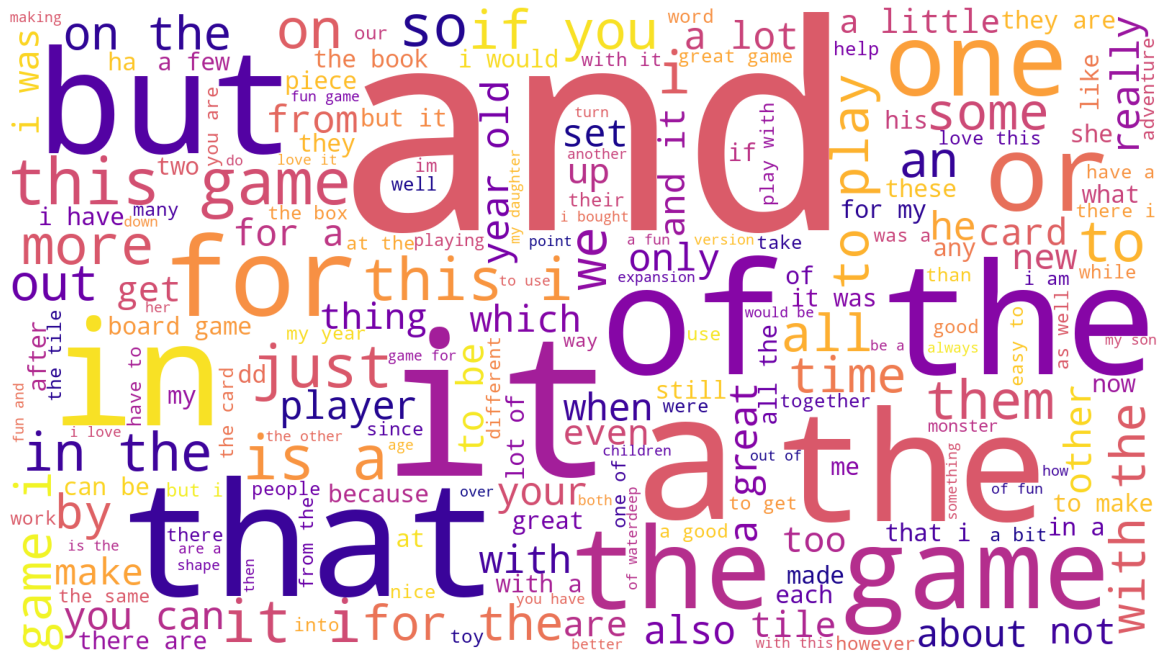

In [53]:
# Review: Plot the WordCloud image.
plt.figure(figsize = (16, 9), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

all_tokens = []
for i in range(df4.shape[0]):
    all_tokens = all_tokens + df4['tokens_review'][i]

In [54]:
# Review: Create a word cloud.
textt = " ".join(summary for summary in df4.summary)
wordcloud = WordCloud(width = 1600, height = 900,
background_color ='white',
colormap ='plasma',
stopwords = 'none',
min_font_size = 10).generate(textt)

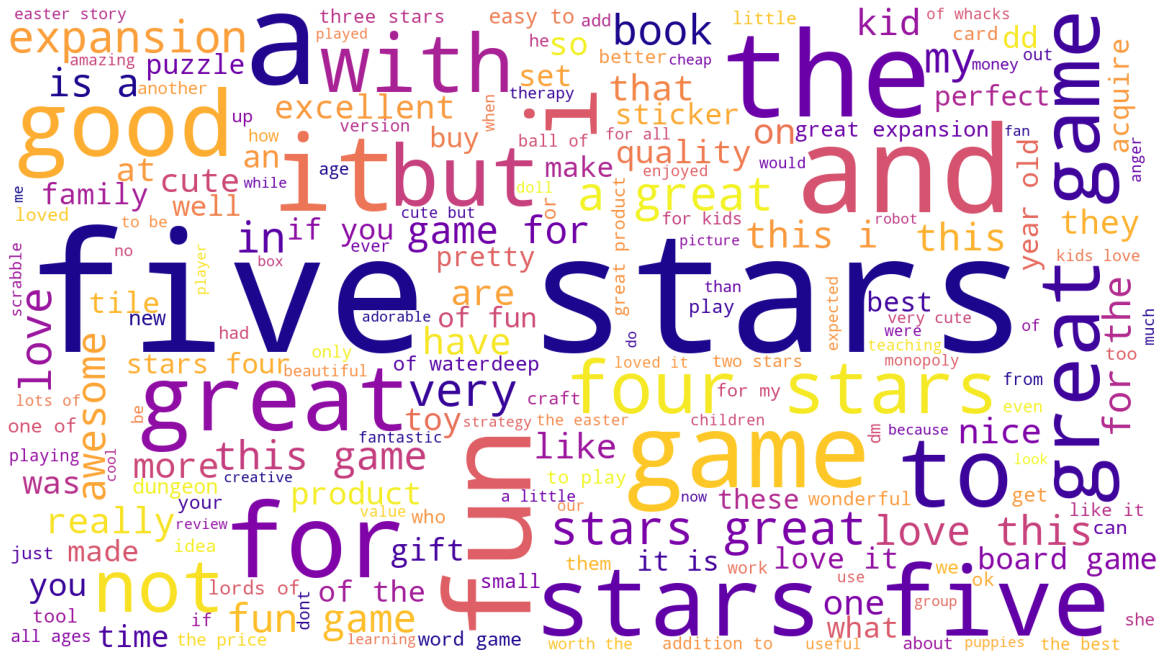

In [55]:
# Review: Plot the WordCloud image.
plt.figure(figsize = (16, 9), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

all_tokens = []
for i in range(df4.shape[0]):
    all_tokens = all_tokens + df4['tokens_summary'][i]

## 4. Frequency distribution and polarity
### 4a) Create frequency distribution

In [56]:
# Determine the frequency distribution.
fdist1 = FreqDist(all_tokens)

# Preview the data.
fdist1

FreqDist({'stars': 427, 'five': 342, 'game': 319, 'great': 295, 'the': 261, 'a': 240, 'for': 232, 'fun': 218, 'to': 192, 'and': 168, ...})

### 4b) Remove alphanumeric characters and stopwords

In [57]:
# Delete all the alphanum.
# Filter out tokens that are neither alphabets nor numbers (to eliminate punctuation marks, etc.).
tokens1 = [word for word in all_tokens if word.isalnum()]

In [58]:
# Remove all the stopwords
# Download the stop word list.
nltk.download ('stopwords')
from nltk.corpus import stopwords

# Create a set of English stop words.
english_stopwords = set(stopwords.words('english'))

# Create a filtered list of tokens without stop words.
tokens2 = [x for x in tokens1 if x.lower() not in english_stopwords]

# Define an empty string variable.
tokens2_string = ''

for value in tokens2:
    # Add each filtered token word to the string.
    tokens2_string = tokens2_string + value + ' '

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nachi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### 4c) Create wordcloud without stopwords

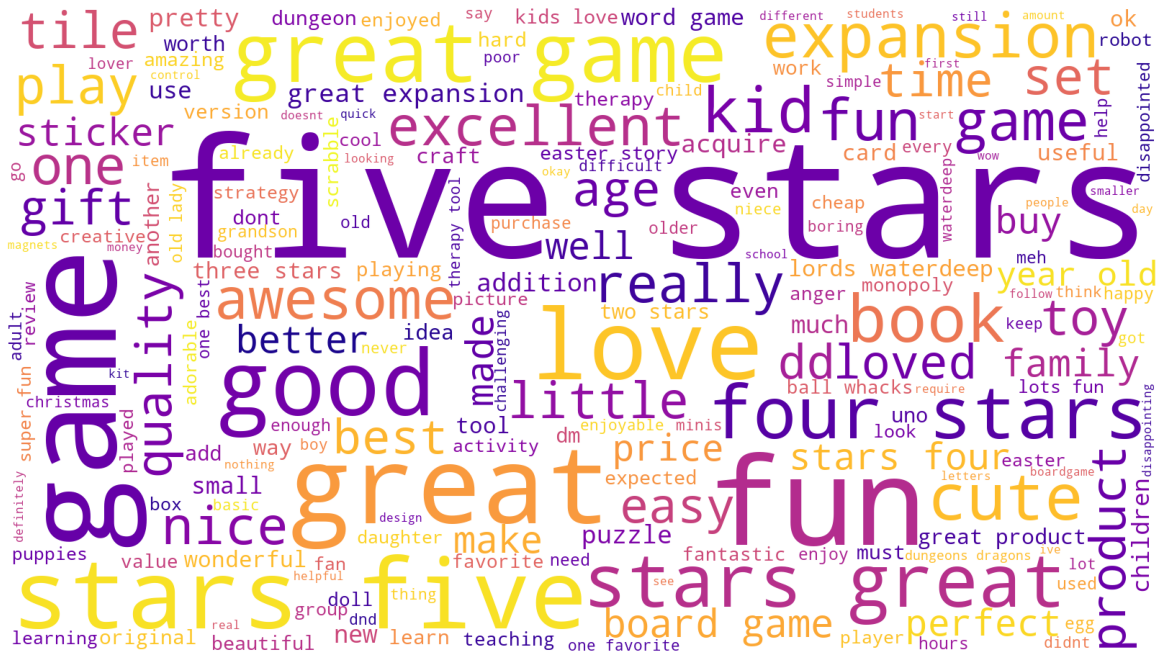

FreqDist({'stars': 427, 'five': 342, 'game': 319, 'great': 295, 'fun': 218, 'love': 93, 'good': 92, 'four': 58, 'like': 54, 'expansion': 52, ...})

In [59]:
# Create a wordcloud without stop words.
wordcloud = WordCloud(width = 1600, height = 900, 
                background_color ='white', 
                colormap='plasma', 
                min_font_size = 10).generate(tokens2_string) 

# Plot the WordCloud image.                        
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

# View the frequency distribution.
fdist1 = FreqDist(tokens2)

# Preview the data.
fdist1

### 4d) Identify 15 most common words and polarity

In [60]:
# Determine the 15 most common words.
# Import the Counter class.
from collections import Counter

# Generate a DataFrame from Counter.
counts = pd.DataFrame(Counter(tokens2).most_common(15),
                      columns=['Word', 'Frequency']).set_index('Word')

# Preview data.
counts

,Frequency
Word,
stars,427
five,342
game,319
great,295
fun,218
love,93
good,92
four,58
like,54


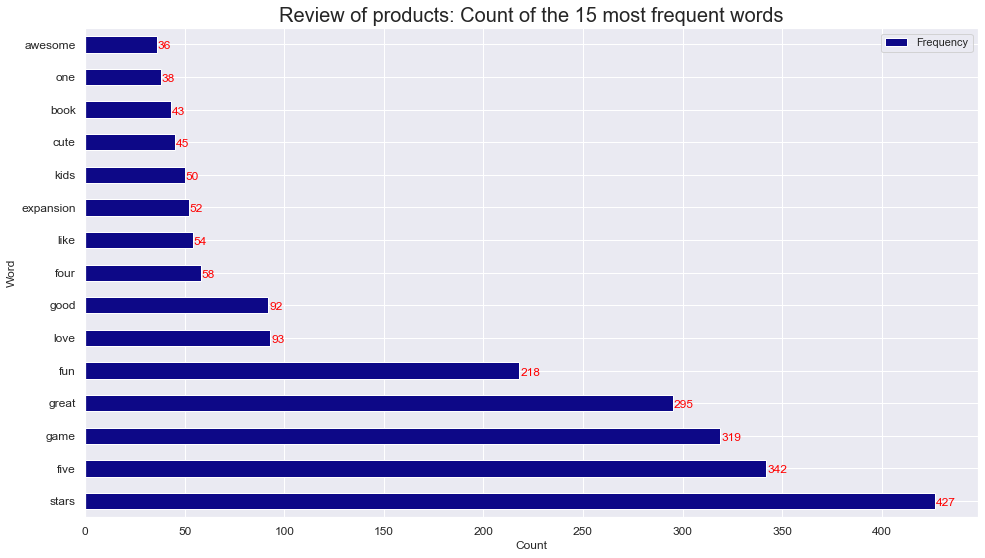

In [61]:
# Set the plot type.
ax = counts.plot(kind='barh', figsize=(16, 9), fontsize=12,
                 colormap ='plasma')

# Set the labels.
ax.set_xlabel('Count', fontsize=12)
ax.set_ylabel('Word', fontsize=12)
ax.set_title("Review of products: Count of the 15 most frequent words",
             fontsize=20)

# Draw the bar labels.
for i in ax.patches:
    ax.text(i.get_width()+.41, i.get_y()+.1, str(round((i.get_width()), 2)),
            fontsize=12, color='red')

## 5. Review polarity and sentiment: Plot histograms of polarity (use 15 bins) and sentiment scores for the respective columns.

In [62]:
# Provided function.
def generate_polarity(comment):
    '''Extract polarity score (-1 to +1) for each comment'''
    return TextBlob(comment).sentiment[0]

In [63]:
# Determine polarity of both columns. 
df4['polarity_review'] = df4['review'].apply(generate_polarity)
df4['polarity_summary'] = df4['summary'].apply(generate_polarity)

df4.head()

,index,review,summary,tokens_review,tokens_summary,polarity_review,polarity_summary
0,0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...,"[when, it, comes, to, a, dms, screen, the, spa...","[the, fact, that, 50, of, this, space, is, was...",-0.036111,0.15
1,1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...,"[an, open, letter, to, galeforce9, your, unpai...","[another, worthless, dungeon, masters, screen,...",0.035952,-0.80
2,2,nice art nice printing why two panels are fill...,pretty but also pretty useless,"[nice, art, nice, printing, why, two, panels, ...","[pretty, but, also, pretty, useless]",0.116640,0.00
3,3,amazing buy bought it as a gift for our new dm...,five stars,"[amazing, buy, bought, it, as, a, gift, for, o...","[five, stars]",0.578788,0.00
4,4,as my review of gf9s previous screens these we...,money trap,"[as, my, review, of, gf9s, previous, screens, ...","[money, trap]",-0.316667,0.00


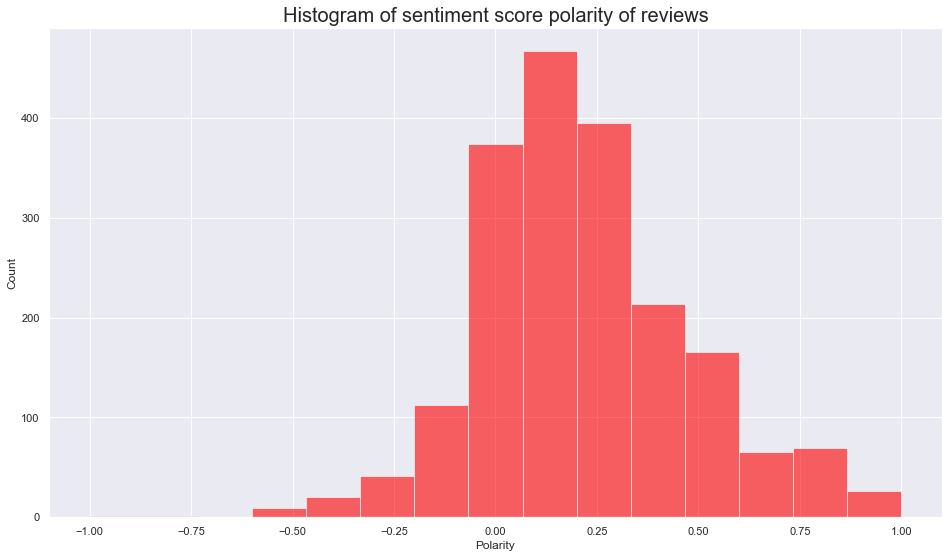

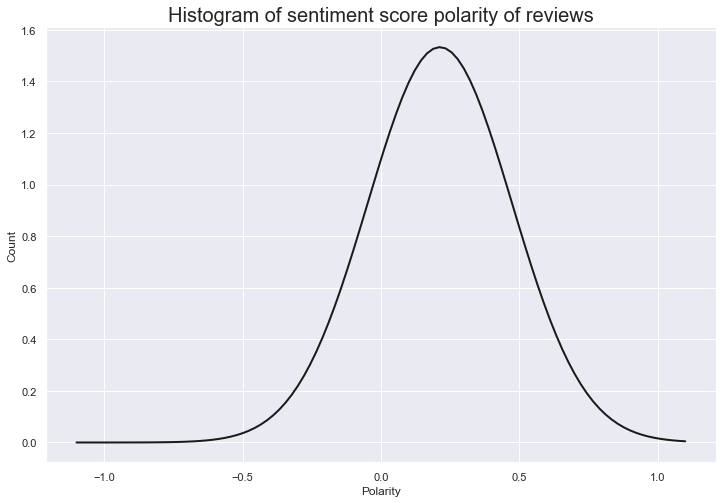

In [64]:
# Review: Create a histogram plot with bins = 15.
# Histogram of polarity
# Set the number of bins.
num_bins = 15

# Set the plot area.
plt.figure(figsize=(16,9))

# Define the bars.
n, bins, patches = plt.hist(df4['polarity_review'], num_bins, facecolor='red', alpha=0.6)

# Set the labels.
plt.xlabel('Polarity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Histogram of sentiment score polarity of reviews', fontsize=20)


# Histogram of sentiment score
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
mu, std = norm.fit(df4['polarity_review']) 
p = norm.pdf(x, mu, std)
plt.figure(figsize=(12, 8))
plt.plot(x, p, 'k', linewidth=2)
plt.xlabel('Polarity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Histogram of sentiment score polarity of reviews', fontsize=20)
plt.show()

Text(0.5, 1.0, 'Histogram of sentiment score polarity of summaries')

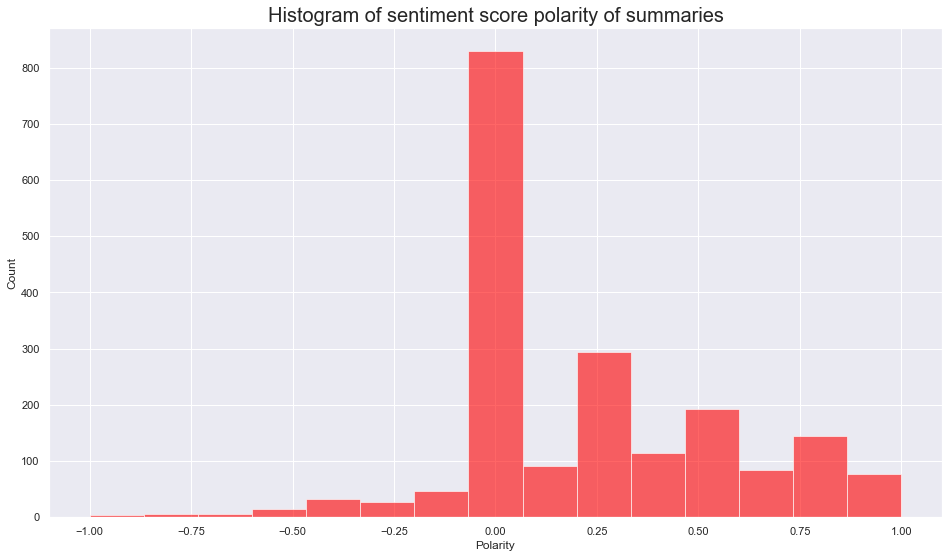

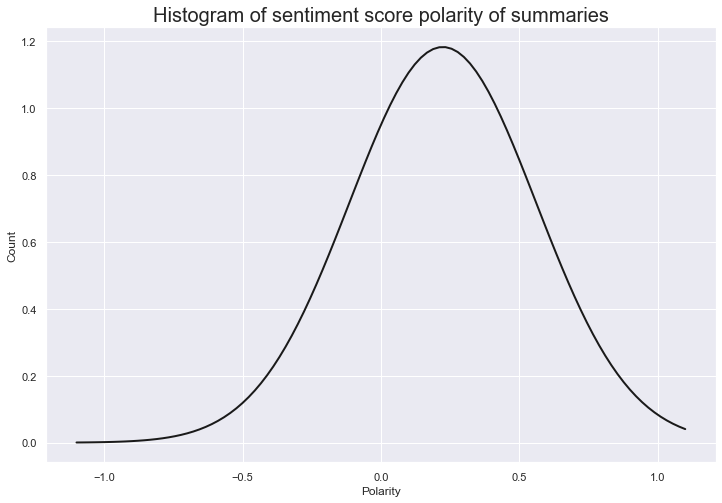

In [65]:
# Review: Create a histogram plot with bins = 15.
# Histogram of polarity
# Set the number of bins.
num_bins = 15

# Set the plot area.
plt.figure(figsize=(16,9))

# Define the bars.
n, bins, patches = plt.hist(df4['polarity_summary'], num_bins, facecolor='red', alpha=0.6)

# Set the labels.
plt.xlabel('Polarity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Histogram of sentiment score polarity of summaries', fontsize=20)


# Histogram of sentiment score
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
mu, std = norm.fit(df4['polarity_summary']) 
p = norm.pdf(x, mu, std)
plt.figure(figsize=(12, 8))
plt.plot(x, p, 'k', linewidth=2)
plt.xlabel('Polarity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Histogram of sentiment score polarity of summaries', fontsize=20)

In [66]:
# Groupby and filter polarity summary in descending order
pd.set_option("display.max_rows", None)
pol_sum = df4.groupby(["summary"])[ "polarity_summary"].sum().reset_index()
pol_sum.sort_values(by=["polarity_summary"], inplace=True, ascending=True)
pol_sum

,summary,polarity_summary
288,disappointed,-3.000000e+00
290,disappointing,-2.400000e+00
119,anger control game,-1.100000e+00
198,boring unless you are a craft person which i am,-1.000000e+00
1155,the worst value ive ever seen,-1.000000e+00
197,boring,-1.000000e+00
163,before this i hated running any rpg campaign d...,-9.000000e-01
126,another worthless dungeon masters screen from ...,-8.000000e-01
80,acquire game,-8.000000e-01
417,fun game,-7.000000e-01


In [67]:
# Define a function to extract a subjectivity score for the comment.
def generate_subjectivity(comment):
    return TextBlob(comment).sentiment[1]

# Populate a new column with subjectivity scores for each comment.
df4['subjectivity_review'] = df4['review'].apply(generate_subjectivity)
df4['subjectivity_summary'] = df4['summary'].apply(generate_subjectivity)
# Preview the result.
df4.head()

,index,review,summary,tokens_review,tokens_summary,polarity_review,polarity_summary,subjectivity_review,subjectivity_summary
0,0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...,"[when, it, comes, to, a, dms, screen, the, spa...","[the, fact, that, 50, of, this, space, is, was...",-0.036111,0.15,0.486111,0.500000
1,1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...,"[an, open, letter, to, galeforce9, your, unpai...","[another, worthless, dungeon, masters, screen,...",0.035952,-0.80,0.442976,0.900000
2,2,nice art nice printing why two panels are fill...,pretty but also pretty useless,"[nice, art, nice, printing, why, two, panels, ...","[pretty, but, also, pretty, useless]",0.116640,0.00,0.430435,0.733333
3,3,amazing buy bought it as a gift for our new dm...,five stars,"[amazing, buy, bought, it, as, a, gift, for, o...","[five, stars]",0.578788,0.00,0.784848,0.000000
4,4,as my review of gf9s previous screens these we...,money trap,"[as, my, review, of, gf9s, previous, screens, ...","[money, trap]",-0.316667,0.00,0.316667,0.000000


## 6. Identify top 20 positive and negative reviews and summaries respectively

In [68]:
# Top 20 negative reviews.
# Create a DataFrame.
negative_sentiment = df4.nsmallest(20, 'polarity_review')

# Eliminate unnecessary columns.
negative_sentiment_final = negative_sentiment[['review', 'polarity_review', 'subjectivity_review']]

# Adjust the column width.
negative_sentiment_final.style.set_properties(subset=['review'], **{'width': '1200px'})

# View output.
negative_sentiment_final

,review,polarity_review,subjectivity_review
207,booo unles you are patient know how to measure...,-1.000000,1.000000
181,incomplete kit very disappointing,-0.780000,0.910000
1773,im sorry i just find this product to be boring...,-0.583333,0.750000
362,one of my staff will be using this game soon s...,-0.550000,0.300000
116,i bought this as a christmas gift for my grand...,-0.500000,0.900000
226,this was a gift for my daughter i found it dif...,-0.500000,1.000000
229,i found the directions difficult,-0.500000,1.000000
289,instructions are complicated to follow,-0.500000,1.000000
300,difficult,-0.500000,1.000000
1501,expensive for what you get,-0.500000,0.700000


In [69]:
# Top 20 negative summaries.
# Create a DataFrame.
negative_sentiment = df4.nsmallest(20, 'polarity_summary')

# Eliminate unnecessary columns.
negative_sentiment_final = negative_sentiment[['summary', 'polarity_summary','subjectivity_summary']]

# Adjust the column width.
negative_sentiment_final.style.set_properties(subset=['summary'], **{'width': '1200px'})

# View output.
negative_sentiment_final

,summary,polarity_summary,subjectivity_summary
21,the worst value ive ever seen,-1.000000,1.000000
207,boring unless you are a craft person which i am,-1.000000,1.000000
819,boring,-1.000000,1.000000
1148,before this i hated running any rpg campaign d...,-0.900000,0.700000
1,another worthless dungeon masters screen from ...,-0.800000,0.900000
143,disappointed,-0.750000,0.750000
623,disappointed,-0.750000,0.750000
785,disappointed,-0.750000,0.750000
1591,disappointed,-0.750000,0.750000
361,promotes anger instead of teaching calming met...,-0.700000,0.200000


In [71]:
# Top 20 positive reviews.
# Create a DataFrame.
positive_sentiment = df4.nlargest(20, 'polarity_review')

# Eliminate unnecessary columns.
positive_sentiment_final = positive_sentiment[['review', 'polarity_review', 'subjectivity_review']]

# Adjust the column width.
positive_sentiment_final.style.set_properties(subset=['review'], **{'width': '1200px'})

# View output.
positive_sentiment_final

,review,polarity_review,subjectivity_review
7,came in perfect condition,1.0,1.0
164,awesome book,1.0,1.0
193,awesome gift,1.0,1.0
489,excellent activity for teaching selfmanagement...,1.0,1.0
517,perfect just what i ordered,1.0,1.0
583,wonderful product,1.0,1.0
601,delightful product,1.0,1.0
613,wonderful for my grandson to learn the resurre...,1.0,1.0
782,perfect,1.0,1.0
923,awesome,1.0,1.0


In [72]:
# Top 20 positive summaries.
# Create a DataFrame.
positive_sentiment = df4.nlargest(20, 'polarity_summary')

# Eliminate unnecessary columns.
positive_sentiment_final = positive_sentiment[['summary', 'polarity_summary', 'subjectivity_summary']]

# Adjust the column width.
positive_sentiment_final.style.set_properties(subset=['summary'], **{'width': '1200px'})

# View output.
positive_sentiment_final

,summary,polarity_summary,subjectivity_summary
6,best gm screen ever,1.0,0.3
28,wonderful designs,1.0,1.0
32,perfect,1.0,1.0
80,theyre the perfect size to keep in the car or ...,1.0,1.0
133,perfect for preschooler,1.0,1.0
139,awesome sticker activity for the price,1.0,1.0
160,awesome book,1.0,1.0
162,he was very happy with his gift,1.0,1.0
186,awesome,1.0,1.0
209,awesome and welldesigned for 9 year olds,1.0,1.0


## 7. Discuss: Insights and observations

***Your observations here...***

To support the marketing department, NLP was applied to measure the sentiment of the customers and analyse the most frequently used words. The data must go through pre-processing to bring the most accurate results. Review and Summary columns text has been changed to lowercase, punctuations and duplications were then removed. Moreover, the text has been split into individual words and it has also been filtered by English stopwords, which, do not bring any significance to the data. This technique has helped identify the most popular used words and by looking at top fifteen words, seven words presented a positive emotion. It is also important to notice that there were not any negative words detected. ‘Stars’ and ‘Five’ were the most popular words. 

By looking at the sentiment score polarity on a histogram, both summary and review are slightly skewed to the right and there is a trend for more positive sentiment. Review distribution looks more symmetric. However, by looking at the summary, there is a substantial high sentiment polarity of score zero.

An analysis was made by looking at top twenty positive/negative reviews. It is important to mention by looking at the negative reviews and summaries, all of them relate to product dissatisfaction rather than customer service. This helps to understand where the focus should be. Also, when exploring top twenty negative, an analysis was made by checking the subjectivity and determine whether reviews are fact-based and objective or opinion-based and subjective. The result is showing a score of more opinion based rather than objective. It is important to priorities fact-based and act from there.

Furthermore, it is crucial to detect why there is such a high value score of 0.0 for sentiment polarity on summaries and investigate the accuracy of these. It was found that all starred reviews have been classified as 0.0 along with a sizeable number of positive reviews.


# 